<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic-Deep-Learning/25_%EB%AC%BC%EC%B2%B4%EC%9D%B8%EC%8B%9D_IoU%2C_NMS_%2C_non_max_suppression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

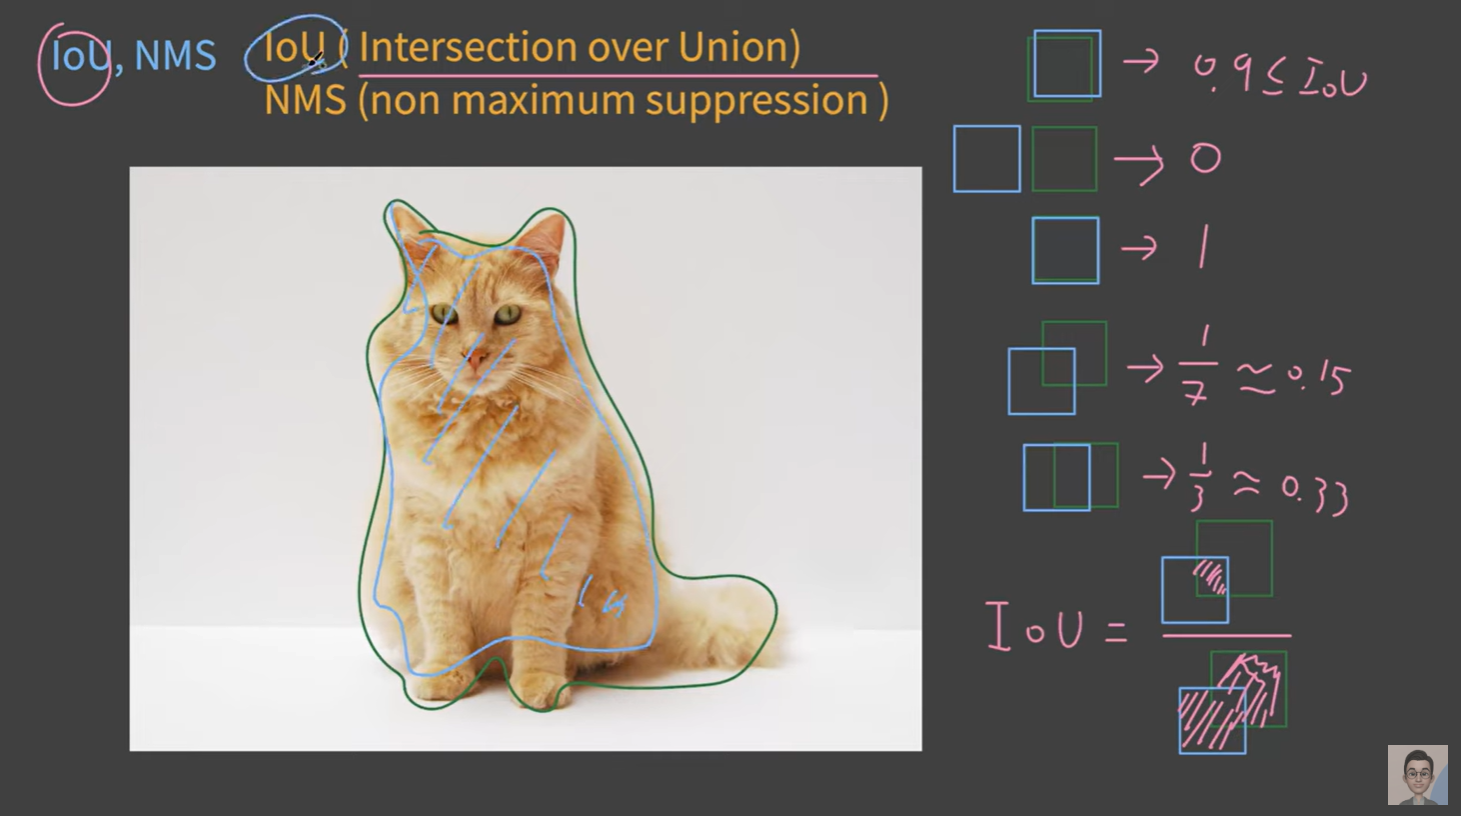
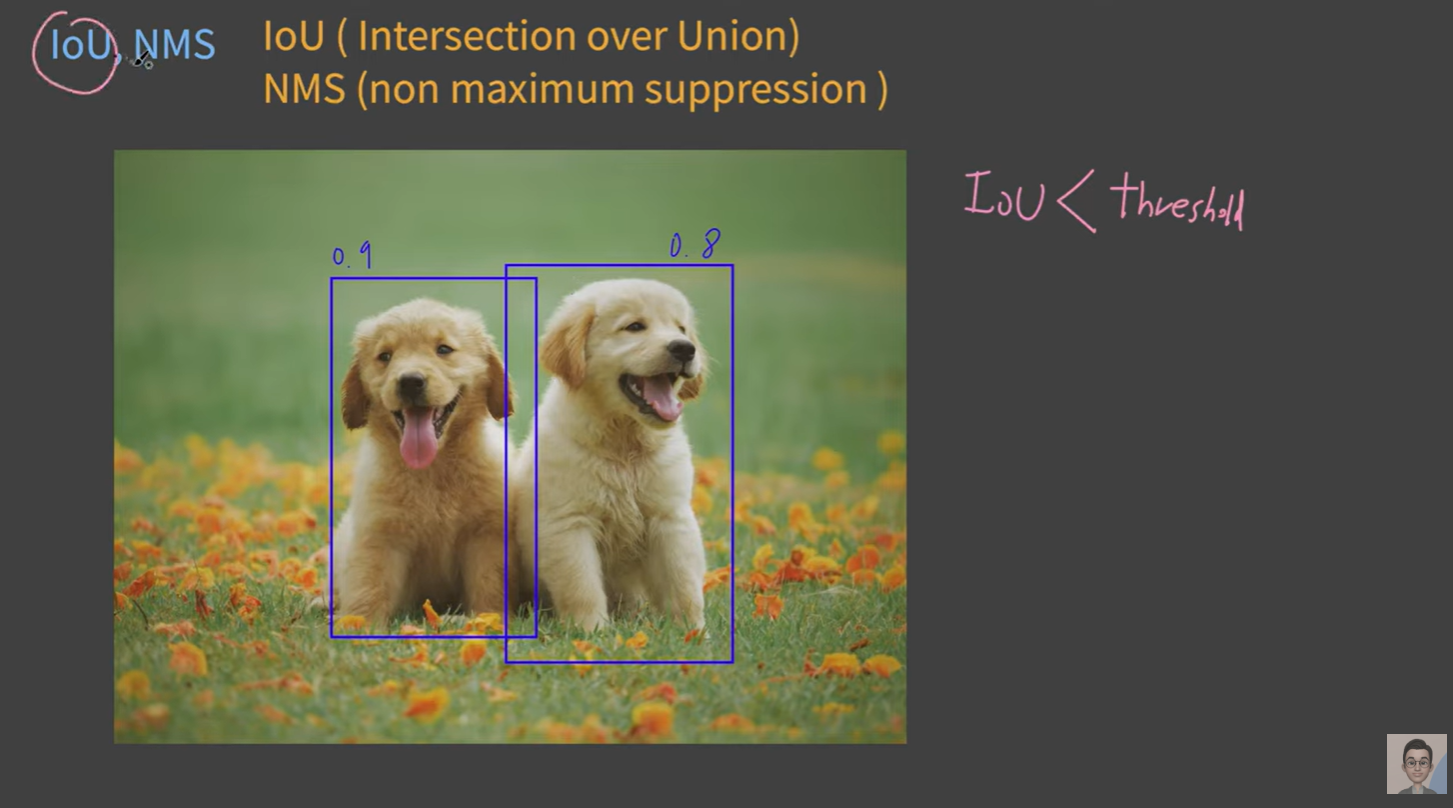

# Object Detection 필수 개념: IoU & Non-Maximum Suppression

이번 시간에는 오브젝트 디텍션 및 세그멘테이션 모델에서 필수적으로 알아야 할 개념인 **Intersection over Union(IoU)**와 **Non-Maximum Suppression(NMS)**에 대해 자세히 알아봅니다.  
이 두 개념은 RCNN 계열 논문이나 다양한 Object Detection 모델에서 자주 등장하며, 컴퓨터 비전을 다룰 때 꼭 알아야 하는 개념입니다.

---

## 1. Intersection over Union (IoU)

### 정의
IoU는 **두 개의 박스가 얼마나 겹치는지**를 수치로 나타내는 지표입니다.  
- 다른 말로는 "인터섹션 오버 유니언"이라고 합니다.
- Object Detection이나 Segmentation 모델의 성능 평가에 사용됩니다.

### 계산 방법
1. **Ground Truth 박스**: 실제 정답 박스
2. **Prediction 박스**: 모델이 예측한 박스
3. **IoU 계산**:  
   \[$$
   IoU = \frac{\text{두 박스가 겹치는 영역 면적}}{\text{두 박스를 합친 전체 영역 면적}}
   $$\]

### 예시
- 겹치지 않음 → IoU = 0
- 완전히 겹침 → IoU = 1
- 부분적으로 겹침 → IoU = 겹친 면적 / 전체 면적
  - 예: 두 박스가 17분의 1만 겹치면 IoU ≈ 0.15
  - 예: 두 박스가 약 1/3 겹치면 IoU ≈ 0.33

### 특징
- 일반적으로 **IoU ≥ 0.9**이면 예측이 매우 정확하다고 판단
- 바운딩 박스뿐만 아니라 **Segmentation Mask**에서도 적용 가능
  - 예: 예측 마스크와 Ground Truth 마스크 면적 비교

---

## 2. Non-Maximum Suppression (NMS)

### 정의
NMS는 **여러 후보 바운딩 박스 중 최종으로 가장 적합한 박스만 선택**하기 위한 후처리(Post-processing) 기법입니다.

### 필요성
- Object Detection 모델은 하나의 객체를 예측할 때 여러 바운딩 박스를 생성할 수 있음
  - 예: 고양이가 하나인데, 모델이 3개의 후보 박스를 예측
- 겹치는 박스 중 **스코어가 가장 높은 박스만 남기고 나머지는 제거**해야 함

### 동작 과정
1. 각 박스별 **스코어(score)** 계산
2. 스코어가 가장 높은 박스를 선택
3. 다른 박스들과의 **IoU** 계산
4. IoU가 **정해진 threshold** 이상이면 스코어 낮은 박스를 제거
5. 모든 후보 박스 반복

### 예시
- 모델이 강아지를 두 개의 박스로 예측  
  - 박스1: 스코어 0.9  
  - 박스2: 스코어 0.8  
- 두 박스 IoU > threshold → 낮은 스코어 박스 제거  
- 두 박스 IoU < threshold → 두 박스 모두 유지

### 특징
- Object Detection 모델에서 **중복된 예측 제거** 필수
- NMS 적용 후 최종 바운딩 박스가 결정됨
- 다양한 이미지와 객체에 적용 가능

---

## 3. 정리
- **IoU**: 예측 박스와 정답 박스가 얼마나 겹치는지 측정
- **NMS**: 여러 겹치는 후보 박스 중 최종으로 하나만 선택
- 이 두 개념은 RCNN 계열 모델이나 YOLO, SSD 등 거의 모든 Object Detection 모델에서 필수적

---

다음 시간에는 Object Detection 모델의 성능 지표인 **mAP(mean Average Precision)**에 대해 알아볼 예정입니다.


**NMS(Non-Maximum Suppression, 비최대 억제)**는 사물 검출(Object Detection) 모델이 동일한 물체에 대해 **중복된 박스를 여러 개 만들었을 때, 가장 정확한 하나만 남기고 나머지를 제거하는 기술**입니다.

### 1. 핵심 요약

* **문제**: 모델은 하나의 물체에 대해 수십 개의 후보 박스를 뿌립니다.
* **해결**: 점수(Confidence Score)가 가장 높은 박스를 기준으로, 이와 많이 겹치는 다른 박스들을 "중복"으로 간주하여 삭제합니다.
* **결과**: 물체당 하나의 깔끔한 박스만 남게 됩니다.

---

### 2. NMS의 작동 단계 (쉬운 예시)

강아지 한 마리를 검출하는데 모델이 3개의 박스를 찾았다고 가정해 봅시다.

* 박스 A (확률 95%)
* 박스 B (확률 80%)
* 박스 C (확률 40%)

1. **정렬**: 확률 점수가 높은 순서대로 나열합니다. (A > B > C)
2. **선택**: 가장 점수가 높은 **박스 A**를 "확정"으로 간주하고 따로 저장합니다.
3. **비교 (IoU 계산)**: 확정된 박스 A와 나머지 박스(B, C)가 얼마나 겹치는지 계산합니다. 이때 사용하는 지표가 **IoU(Intersection over Union)**입니다.
* 박스 B가 A와 80% 겹친다면? → "너는 A와 같은 물체를 가리키는 중복 박스구나!" 하고 **제거**합니다.
* 박스 C가 A와 10%만 겹친다면? → "너는 다른 물체일 수도 있으니 일단 유지해 보자."


4. **반복**: 남은 박스들에 대해 위 과정을 반복합니다.

---

### 3. IoU(Intersection over Union)란?

NMS를 이해하기 위해 꼭 알아야 하는 개념입니다. 두 박스가 얼마나 겹치는지를 0에서 1 사이의 수치로 나타냅니다.

* **공식**:
* 보통 **IoU 임계값(Threshold)**을 0.5 정도로 설정합니다. 즉, 50% 이상 겹치면 중복이라고 판단하는 것입니다.

---

In [3]:
!git clone https://github.com/NoCodeProgram/deepLearning.git

Cloning into 'deepLearning'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 318 (delta 80), reused 134 (delta 55), pack-reused 139 (from 1)
Receiving objects: 100% (318/318), 17.60 MiB | 26.89 MiB/s, done.
Resolving deltas: 100% (116/116), done.


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth


100%|██████████| 167M/167M [00:01<00:00, 156MB/s]


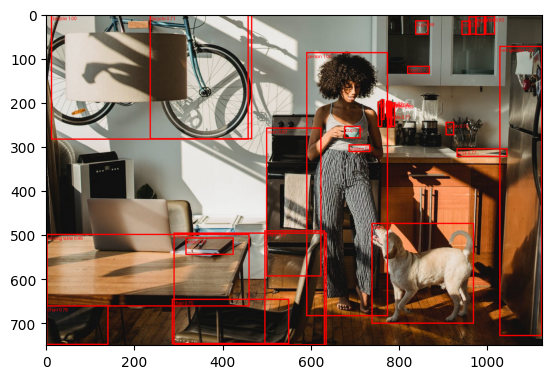

person: 1.00, Box: [590.0516967773438, 86.38232421875, 775.5267944335938, 684.742919921875]
refrigerator: 1.00, Box: [1028.9781494140625, 72.16678619384766, 1125.0, 729.7279052734375]
chair: 1.00, Box: [289.4176025390625, 495.75445556640625, 636.7652587890625, 750.0]
bicycle: 1.00, Box: [11.558060646057129, 0.0, 459.96710205078125, 284.63873291015625]
dog: 0.99, Box: [738.3868408203125, 473.8596496582031, 970.2676391601562, 701.5191650390625]
cup: 0.99, Box: [837.9345703125, 14.075801849365234, 867.2156372070312, 46.485836029052734]
book: 0.97, Box: [316.75579833984375, 506.4464416503906, 425.5136413574219, 545.9620971679688]
dining table: 0.96, Box: [1.9361686706542969, 498.9629821777344, 461.3005065917969, 662.6849975585938]
knife: 0.96, Box: [752.310302734375, 198.58444213867188, 762.2491455078125, 255.80120849609375]
knife: 0.94, Box: [771.9946899414062, 196.88552856445312, 780.2267456054688, 233.0719757080078]
frisbee: 0.92, Box: [686.1424560546875, 295.3083801269531, 735.44195556

In [4]:
import torch
from torchvision.io import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
from torchvision.ops import nms
from PIL import ImageFont
import matplotlib.pyplot as plt

# 1️⃣ 이미지 불러오기
img_path = "deepLearning/detectSegment/sample.jpeg"
img = read_image(img_path)  # [C,H,W], dtype=uint8

# 2️⃣ 모델과 가중치 불러오기
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights)
model.eval()

# 3️⃣ 전처리
preprocess = weights.transforms()
batch = [preprocess(img)]

# 4️⃣ 추론
with torch.no_grad():
    prediction = model(batch)[0]

boxes = prediction['boxes']
scores = prediction['scores']
labels = prediction['labels']

# 5️⃣ Score Threshold 적용
score_thresh = 0.7
mask = scores > score_thresh
boxes = boxes[mask]
scores = scores[mask]
labels = labels[mask]

# 6️⃣ Non-Maximum Suppression 적용
iou_thresh = 0.5
keep_idx = nms(boxes, scores, iou_thresh)

boxes = boxes[keep_idx]
scores = scores[keep_idx]
labels = labels[keep_idx]

# 7️⃣ 숫자 label → 이름으로 변환
label_names = [weights.meta['categories'][i] for i in labels]

# 8️⃣ 폰트 지정 (label 표시)
try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", size=20)
except:
    font = None

# 9️⃣ Bounding Box + label 그리기
boxed_img = draw_bounding_boxes(
    img,
    boxes=boxes,
    labels=[f"{name} {score:.2f}" for name, score in zip(label_names, scores)],
    colors="red",
    width=3,
    font=font
)

# 10️⃣ PIL 이미지로 변환 후 출력
im = to_pil_image(boxed_img.detach())
plt.imshow(im)
plt.show()
# 11️⃣ 콘솔에 최종 예측 출력
for name, score, box in zip(label_names, scores, boxes):
    print(f"{name}: {score:.2f}, Box: {box.tolist()}")
